## Workbook 2
Visualization of time series data.

As mentioned in Notebook #1, each time series signal is a one-dimensional array of 800,000 samples spanning 20 milliseconds. Let's now explore the data from the original metadata CSV and Adobe Parquet archive. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py

%matplotlib inline

Ideally a 50 Hz sinusoid oscillating between +/- 20 kV would look as follows:

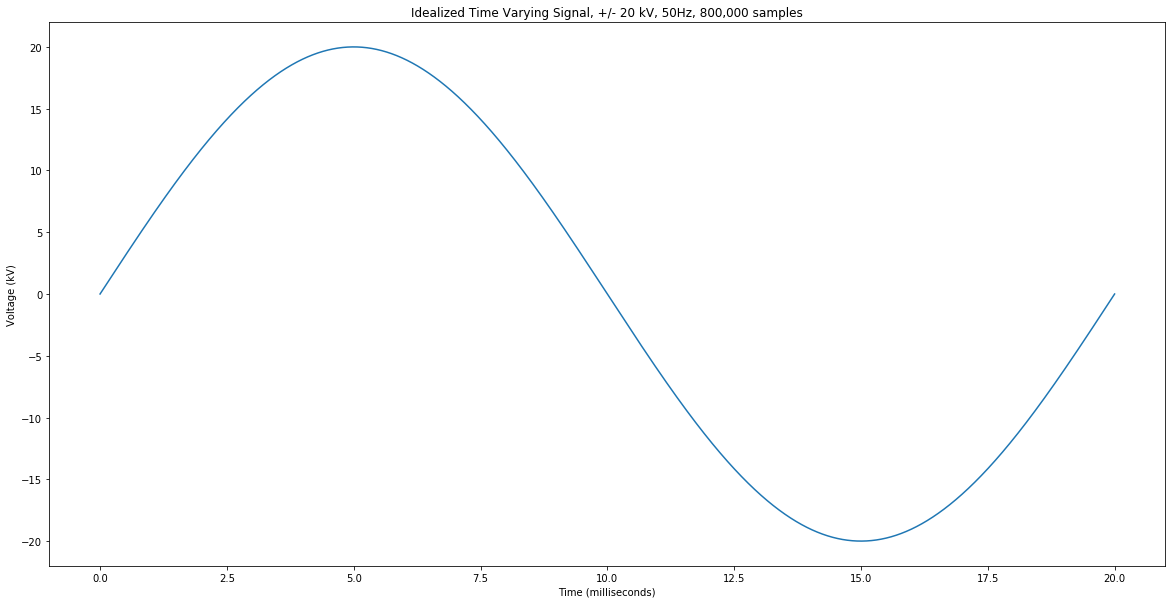

In [10]:
fs = 1000 
f = 50 

x = np.linspace(0, 20, 800_000) 
y = [ 20*np.sin(2*np.pi*f * (i/fs)) for i in x]

plt.figure(figsize=(20,10))
plt.title('Idealized Time Varying Signal, +/- 20 kV, 50Hz, 800,000 samples')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Voltage (kV)')
plt.plot(x, y)
plt.show();

The actual 50 Hz signals measured from the first three signal IDs: 1, 2, 3 look as follows:

In [11]:
df_train = pd.read_parquet('VSB_unpacked/train.parquet')

signal0 = df_train.loc[:, '0']
signal1 = df_train.loc[:, '1']
signal2 = df_train.loc[:, '2']
signal3 = df_train.loc[:, '3']

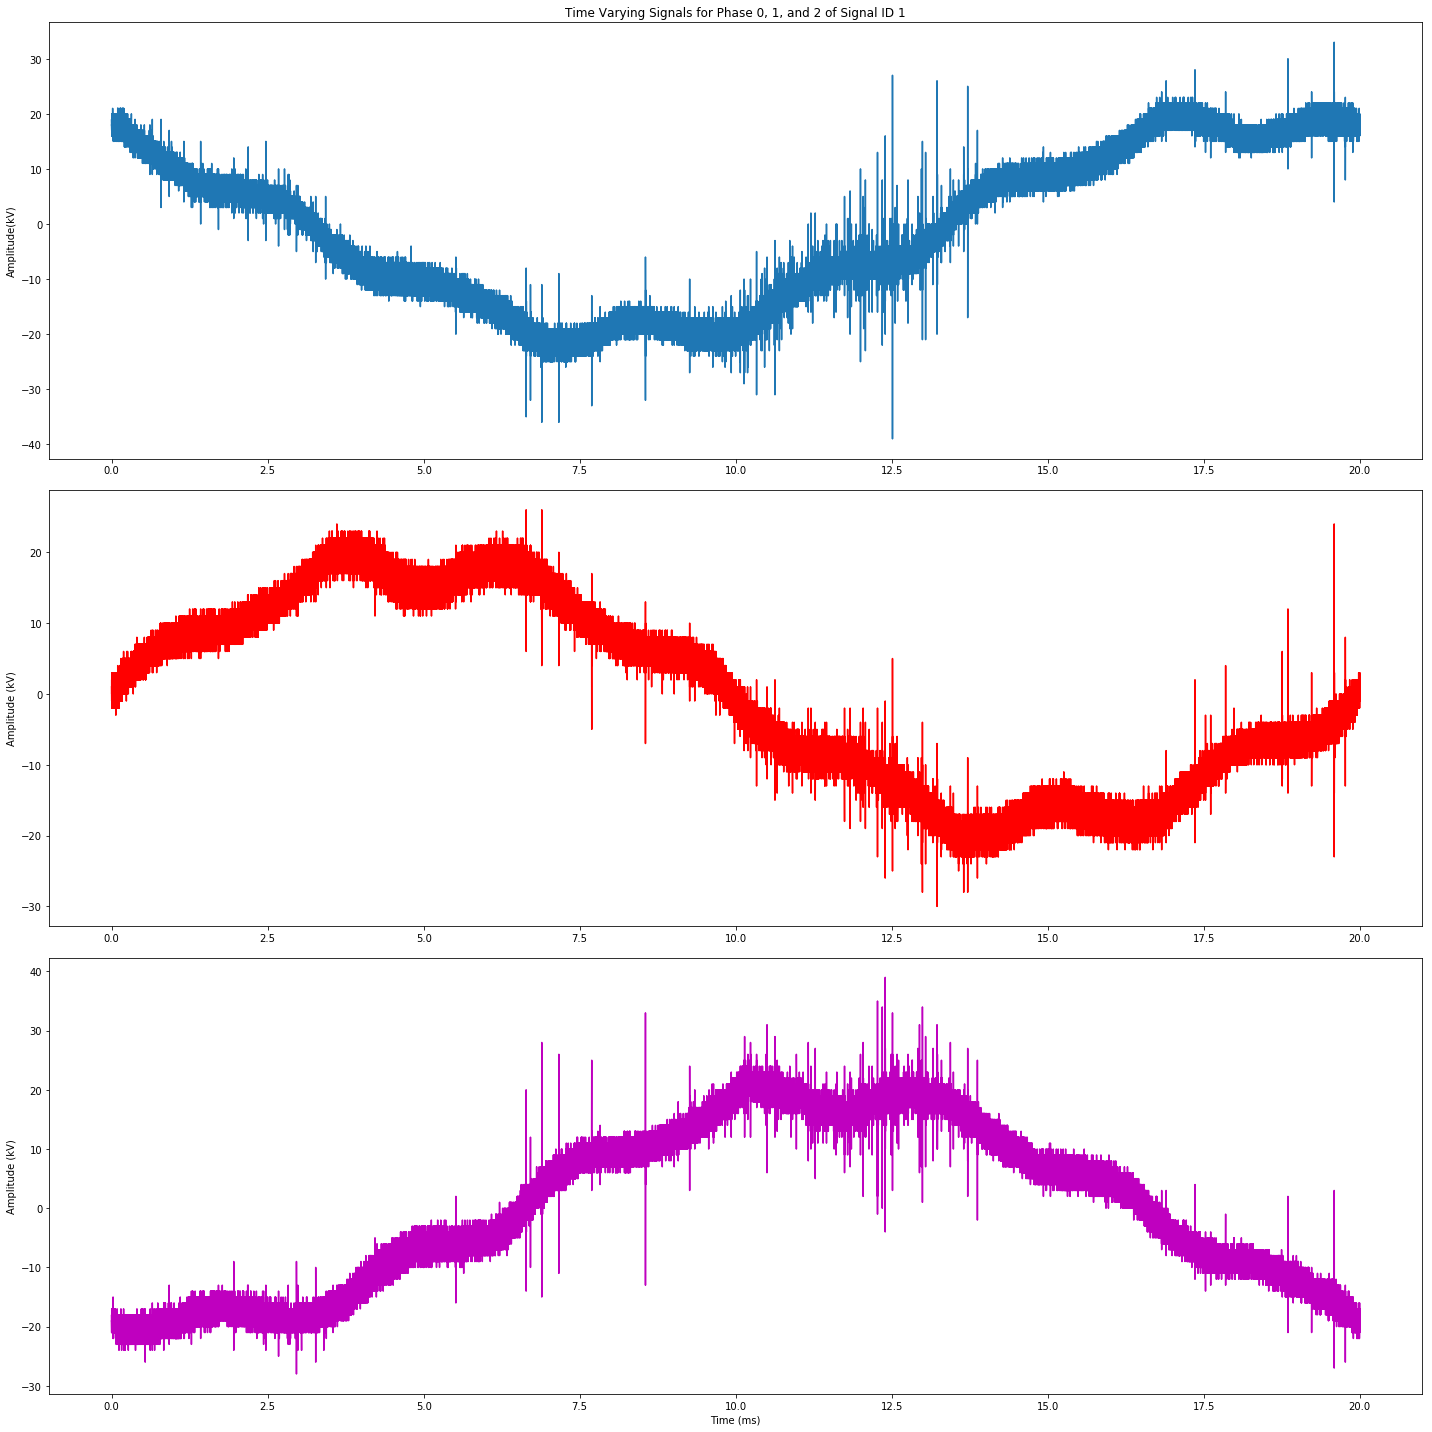

In [16]:
fig, ax = plt.subplots(3, 1, figsize=(20,20))

ax[0].plot(x,signal0)

ax[0].set_ylabel('Amplitude(kV)')
ax[1].plot(x,signal1,'r') 

ax[1].set_ylabel('Amplitude (kV)')
ax[2].plot(x,signal2,'m') 
ax[2].set_xlabel('Time (ms)')
ax[2].set_ylabel('Amplitude (kV)')
ax[0].set_title('Time Varying Signals for Phase 0, 1, and 2 of Signal ID 1')
plt.tight_layout()
plt.show();

The three time varying signals above show obvious distortion in a variety of time scales. First off, the 50Hz signal shows undulations overlaid on its 50Hz carrier. Sharp spikes composed of only one or two samples in length correspond to high frequency components probably within the range of Megahertz. It's also expected that one would see harmonics of 50Hz, i.e., 50 Hz * N, where N= 1, 2, 3, ...

All three of these signals are part of the same measurement_id and are the wires 0, 1 and 2 corresponding to the three phases for 3-phase transmission.

Now let's visualize time-series data for a single-phase experiencing PD as determined by the metadata target labels.

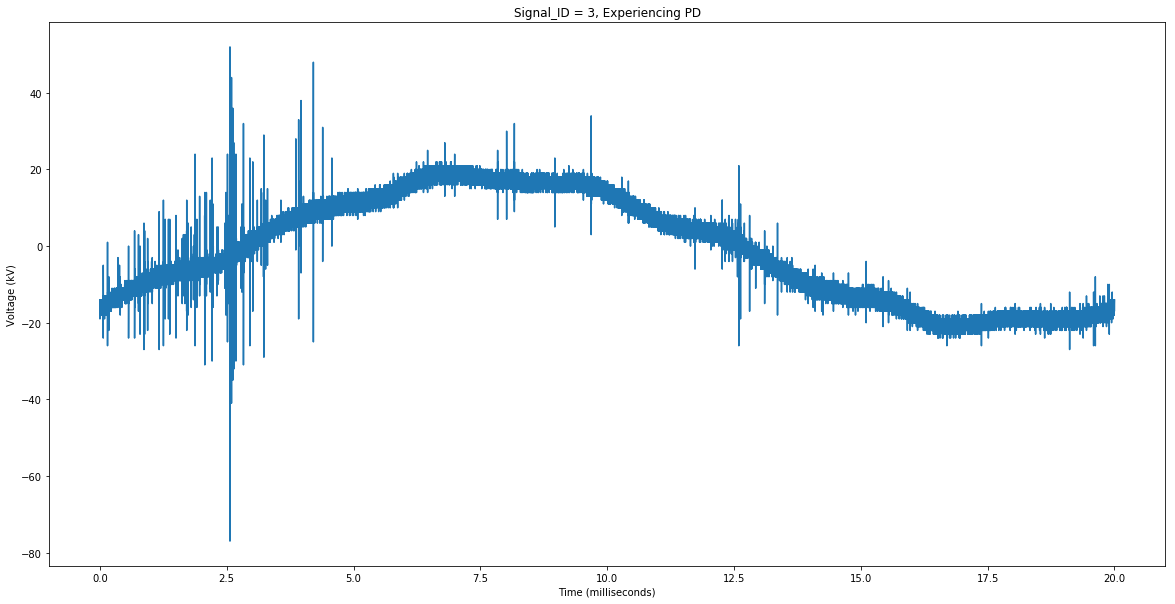

In [17]:
plt.figure(figsize=(20,10))
plt.title('Signal_ID = 3, Experiencing PD')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Voltage (kV)')
plt.plot(x, signal3)
plt.show();

Observe the relatively wide spike at 2.5 milliseconds. This most likely corresponds to a partial discharge event.

Partial discharge can be thought of as alocalized breakdown occuring from within a single wire. This can be due to lacunas (voids) within the insulating material or even in the insulating oil of transformers.
 
 In contrast to coronal arcing, which occurs between two or more wires and is visual to the eye at a distance, partial discharge remians unseen and must be determined by localized measurement. Protracted partial discharge inevitably lead to a full discharge event (short circuit) due to insulator breakdown. The resultant short circuit often leads to catestrophic component loss, and prezents a sigificant hazard to person and property.
 
All medium and high voltage transmission lines are suscpetible to heightened likelihood of partial discharge due to mishandling of transmission lines, bith at time of installation as well as after a time in the field. Even so, all lines ultimately are assumed to be at risk due to the increased stress generated by a large electromagnetic field.

A large body of academic literature discusses better ways to detect and predict partial discharge. Better modeling in turn leads to ease by which all segments of the electrical transmission grid can move towards inxepensive conitinuous monitoring.

For real measurements from the the field, it is evident to the eye the degree of distortion that each transmission line is experiencing. Even without a frequency spectrum analysis, one can still surmise a number of high frequency events that standard apart from the expected and large 50 Hertz carrier wave. Above are two phases without a partial discharge diagnosis as well as one experiencing a partial discharge failure.

The transient events evinced in the above time-series data strongly suggest that a frequency space analysis using a fast fourier transform be performed. 

See Notebook #3